Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8271643849108639
Accuracy:  0.7932960893854749


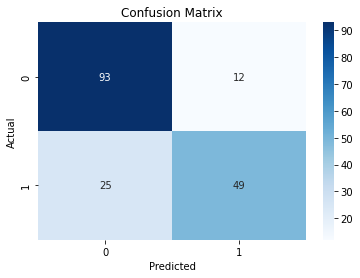

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score


x = pd.read_csv("C:/Users/USER/Documents/Machine_Learning_Algorithms/Datasets/titanic.csv")

#Preprocess and split the data

le=LabelEncoder()
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"].unique()

x.isnull().sum()

x['Age'].fillna(x['Age'].median(), inplace=True)

x = x.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)

X=x.drop(['Survived'],axis=1)
y=x['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate the accuracy score
accuracy = grid_search.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Create the confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()